## Assignment for Module 5, Training Models

In this assignment you will train different models on a given data set, and find the one that performs best

### Getting the data for the assignment (similar to the notebook from chapter 2 of Hands-On...)

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()

### Fix the categories in the categorical variable

In [5]:
d = {'<1H OCEAN':'LESS_1H_OCEAN', 'INLAND':'INLAND', 'ISLAND':'ISLAND', 'NEAR BAY':'NEAR_BAY', 'NEAR OCEAN':'NEAR_OCEAN'}
housing['ocean_proximity'] = housing['ocean_proximity'].map(lambda s: d[s])

### Add 2 more features

In [6]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["population_per_household"]=housing["population"]/housing["households"]

### Fix missing data

In [7]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True) 

### Create dummy variables based on the categorical variable

In [8]:
one_hot = pd.get_dummies(housing['ocean_proximity'])
housing = housing.drop('ocean_proximity', axis=1)
housing = housing.join(one_hot)

### Check the data

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
rooms_per_household         20640 non-null float64
population_per_household    20640 non-null float64
INLAND                      20640 non-null uint8
ISLAND                      20640 non-null uint8
LESS_1H_OCEAN               20640 non-null uint8
NEAR_BAY                    20640 non-null uint8
NEAR_OCEAN                  20640 non-null uint8
dtypes: float64(11), uint8(5)
memory usage: 1.8 MB


# ASSIGNMENT

### 1. Partition into train and test

Use train_test_split from sklearn.model_selection to partition the dataset into 70% for training and 30% for testing.

You can use the 70% for training set as both training and validation by using cross-validation.


In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.3, random_state=0)

### Features

In [11]:
target = 'median_house_value'
features = list(train_set.columns)
features = [f for f in features if f!=target]

In [12]:
X_tr = train_set[features]
y_tr = train_set[[target]]

X_te = test_set[features]
y_te = test_set[[target]]

### 2. Polynomial transformations

Use PolynomialFeatures from sklearn.preprocessing

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly.fit(X_tr)
X_tr = poly.transform(X_tr)
X_te = poly.transform(X_te)

##### You should obtain X_tr and X_te with 136 columns each, since originally you had 15 features.

##### With m original features, the new added polynomial features of degree 2 are: $(m^2-m)/2+m+1$. Why?

##### These, plus the original features gives a total of  $(m^2-m)/2+2m+1$

Each of the 15 features get to pair with another features, so $x_i$ gets to pair with $x_j$, also with $x_i$ itself:

15 + 14 + ... + 1 = 16 * 15 / 2 = 120.

Plus the original 15 = 135.

Plus the coefficient = 136.

In [14]:
print("Original number of features: "+str(len(features)))
print("Final number of features: "+str(X_tr.shape[1]))

Original number of features: 15
Final number of features: 136


In [15]:
features_transformed = poly.get_feature_names(features)
print(features_transformed)

['1', 'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'population_per_household', 'INLAND', 'ISLAND', 'LESS_1H_OCEAN', 'NEAR_BAY', 'NEAR_OCEAN', 'longitude^2', 'longitude latitude', 'longitude housing_median_age', 'longitude total_rooms', 'longitude total_bedrooms', 'longitude population', 'longitude households', 'longitude median_income', 'longitude rooms_per_household', 'longitude population_per_household', 'longitude INLAND', 'longitude ISLAND', 'longitude LESS_1H_OCEAN', 'longitude NEAR_BAY', 'longitude NEAR_OCEAN', 'latitude^2', 'latitude housing_median_age', 'latitude total_rooms', 'latitude total_bedrooms', 'latitude population', 'latitude households', 'latitude median_income', 'latitude rooms_per_household', 'latitude population_per_household', 'latitude INLAND', 'latitude ISLAND', 'latitude LESS_1H_OCEAN', 'latitude NEAR_BAY', 'latitude NEAR_OCEAN', 'housing_median_age^2', 'hous

In [16]:
features_cat = ['INLAND',
                'ISLAND',
                'LESS_1H_OCEAN',
                'NEAR_BAY',
                'NEAR_OCEAN']

features_cat_combo = features_cat.copy()

for f1 in features_cat:
    for f2 in features_cat:
        if f1 == f2:
            features_cat_combo.append("{0}^2".format(f1))
        else:
            features_cat_combo.append("{0} {1}".format(f1, f2))
            features_cat_combo.append("{0} {1}".format(f2, f1))
                                     
print(features_cat_combo)

['INLAND', 'ISLAND', 'LESS_1H_OCEAN', 'NEAR_BAY', 'NEAR_OCEAN', 'INLAND^2', 'INLAND ISLAND', 'ISLAND INLAND', 'INLAND LESS_1H_OCEAN', 'LESS_1H_OCEAN INLAND', 'INLAND NEAR_BAY', 'NEAR_BAY INLAND', 'INLAND NEAR_OCEAN', 'NEAR_OCEAN INLAND', 'ISLAND INLAND', 'INLAND ISLAND', 'ISLAND^2', 'ISLAND LESS_1H_OCEAN', 'LESS_1H_OCEAN ISLAND', 'ISLAND NEAR_BAY', 'NEAR_BAY ISLAND', 'ISLAND NEAR_OCEAN', 'NEAR_OCEAN ISLAND', 'LESS_1H_OCEAN INLAND', 'INLAND LESS_1H_OCEAN', 'LESS_1H_OCEAN ISLAND', 'ISLAND LESS_1H_OCEAN', 'LESS_1H_OCEAN^2', 'LESS_1H_OCEAN NEAR_BAY', 'NEAR_BAY LESS_1H_OCEAN', 'LESS_1H_OCEAN NEAR_OCEAN', 'NEAR_OCEAN LESS_1H_OCEAN', 'NEAR_BAY INLAND', 'INLAND NEAR_BAY', 'NEAR_BAY ISLAND', 'ISLAND NEAR_BAY', 'NEAR_BAY LESS_1H_OCEAN', 'LESS_1H_OCEAN NEAR_BAY', 'NEAR_BAY^2', 'NEAR_BAY NEAR_OCEAN', 'NEAR_OCEAN NEAR_BAY', 'NEAR_OCEAN INLAND', 'INLAND NEAR_OCEAN', 'NEAR_OCEAN ISLAND', 'ISLAND NEAR_OCEAN', 'NEAR_OCEAN LESS_1H_OCEAN', 'LESS_1H_OCEAN NEAR_OCEAN', 'NEAR_OCEAN NEAR_BAY', 'NEAR_BAY NEAR

In [17]:
features_cat_poly = []
features_num_poly = []

for i,f in enumerate(features_transformed):
    if f in features_cat_combo:
        features_cat_poly.append(i)
    else:
        features_num_poly.append(i)

print(features_cat_poly)
print(features_num_poly)

[11, 12, 13, 14, 15, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]


### 3. Scaling features

Similarly, use StandardScaler from sklearn.preprocessing to normalize the training and testing data, using the training data

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

In [20]:
preprocess_pipeline = make_pipeline(
    FeatureUnion(transformer_list=[
        ("categorical_features_untouch", make_pipeline(
            ColumnSelector(columns=features_cat_poly)
        )),
        ("numeric_features_transform", make_pipeline(
            ColumnSelector(columns=features_num_poly),
            # Normalize
            StandardScaler()
        ))
    ])
)

In [21]:
preprocess_pipeline.fit(pd.DataFrame(X_tr))

X_tr = preprocess_pipeline.transform(pd.DataFrame(X_tr))
X_te = preprocess_pipeline.transform(pd.DataFrame(X_te))

In [22]:
pd.DataFrame(X_tr).head()

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.011655,-0.839646,-0.345004,-0.370936,-0.008997,0.681905,-0.011763,-0.814136,-0.336107,-0.092013
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.011655,-0.839646,1.815750,-0.370936,-0.012846,-0.179384,-0.011763,-0.814136,3.100108,-0.092013
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.011655,1.553498,-0.345004,-0.370936,-0.011376,-0.179384,-0.011763,1.492999,-0.336107,-0.092013
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.011655,0.090566,-0.345004,-0.370936,-0.012792,-0.179384,-0.011763,1.033176,-0.336107,-0.092013
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.011655,-0.839646,-0.345004,-0.370936,-0.011744,0.468366,-0.011763,-0.814136,-0.336107,-0.092013


In [23]:
pd.DataFrame(X_te).head()

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.011655,-0.839646,-0.345004,2.728158,-0.010573,-0.179384,-0.011763,-0.814136,-0.336107,0.880780
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.011655,1.416516,-0.345004,-0.370936,-0.012841,-0.179384,-0.011763,1.014999,-0.336107,-0.092013
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.011655,-0.839646,-0.345004,-0.370936,-0.013020,0.340087,-0.011763,-0.814136,-0.336107,-0.092013
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.011655,-0.839646,-0.345004,-0.370936,-0.013271,0.310877,-0.011763,-0.814136,-0.336107,-0.092013
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.011655,-0.839646,2.196984,-0.370936,-0.014523,-0.179384,-0.011763,-0.814136,1.613555,-0.092013


#### Comparing models

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

### 4. Linear regression on original features (no transformations) --- benchmark

#### Your goal is to find the model that minimizes the rmse score

In [25]:
from sklearn.linear_model import LinearRegression
lin_scores = cross_val_score(LinearRegression(), train_set[features], train_set[target], scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [68467.34965417 69923.01197952 68470.88999986 68207.01493917]
Mean: 68767.06664318193


### 5. Linear regression  (on transformed features: polynomial transformation + scaling)

Now do as in 4 but with the original and transformed features (136 features)

In [26]:
lin_scores_transformed = cross_val_score(LinearRegression(), X_tr, y_tr, scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores_transformed = np.sqrt(-lin_scores_transformed)
display_scores(lin_rmse_scores_transformed)

Scores: [1.57818657e+05 8.73512425e+04 4.18730943e+16 2.75979063e+16]
Mean: 1.7367750157626596e+16


If the error on the cross-validation is too high it is because the model is over-fitting. Regularization is needed.

### 6. Ridge regression

In [27]:
from sklearn.linear_model import Ridge
param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000]}]
grid_search_rr = GridSearchCV(Ridge(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_rr.fit(X_tr, y_tr)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [28]:
print(grid_search_rr.best_params_)
print(np.sqrt(-grid_search_rr.best_score_))

{'alpha': 1000}
66546.31850955132


### 7. Lasso regression

Now do the same as in 6 but with Lasso

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
from sklearn.linear_model import Lasso
param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000]}]
grid_search_lr = GridSearchCV(Lasso(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_tr, y_tr)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [31]:
print(grid_search_lr.best_params_)
print(np.sqrt(-grid_search_lr.best_score_))

{'alpha': 1000}
66513.99721189485


### 8. Elastic Net regression

Do the same as in 6 and 7, but now with Elastic Net. However, the grid search should be over the parameters alpha and  l 1ratio. Use just 3 values for l1_ratio.

In [32]:
from sklearn.linear_model import ElasticNet
param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000],
              'l1_ratio': [0.25, 0.5, 0.75]}]
grid_search_en = GridSearchCV(ElasticNet(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_en.fit(X_tr, y_tr)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'l1_ratio': [0.25, 0.5, 0.75]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [33]:
print(grid_search_en.best_params_)
print(np.sqrt(-grid_search_en.best_score_))

{'alpha': 0.1, 'l1_ratio': 0.5}
66103.66491208452


In [35]:
# Final RMSE on the training set using ElasticNet
from sklearn.metrics import mean_squared_error

y_tr_estimation = grid_search_en.best_estimator_.predict(X_tr)

tr_mse = mean_squared_error(y_tr, y_tr_estimation)
tr_rmse = np.sqrt(tr_mse)

print(tr_rmse)

65064.98539584745


### Evaluating your best model on TESTING data

Choose among grid_search_rr, grid_search_lr, and grid_search_enr, the model with best performance

In [36]:
# ElasticNet produced the lowest RMSE
final_model = grid_search_en.best_estimator_   ## grid_search SHOULD BE THE BEST GRID SEARCH ##

y_te_estimation = final_model.predict(X_te)

final_mse = mean_squared_error(y_te, y_te_estimation)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

66365.45298518328


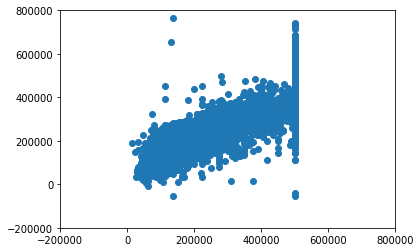

In [38]:
import matplotlib.pyplot as plt

plt.scatter(x=y_te, y=y_te_estimation)
plt.xlim([-200000,800000])
plt.ylim([-200000,800000])
plt.show()

In [39]:
# Plot Learning Curve

from sklearn.metrics import mean_squared_error

model_en = ElasticNet(alpha = 0.1, l1_ratio = 0.5)

train_errors, test_errors = [], []
for m in range(1, len(X_tr), 100):
    model_en.fit(X_tr[:m], y_tr[:m])
    y_tr_pred = model_en.predict(X_tr[:m])
    y_te_pred = model_en.predict(X_te)
    train_errors.append(mean_squared_error(y_tr_pred, y_tr[:m]))
    test_errors.append(mean_squared_error(y_te_pred, y_te))

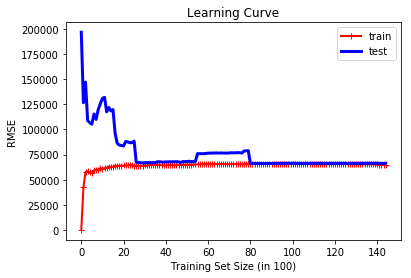

In [40]:
plt.title("Learning Curve")
plt.xlabel('Training Set Size (in 100)')
plt.ylabel('RMSE')
plt.plot(np.sqrt(train_errors),"r-+", linewidth=2, label='train')
plt.plot(np.sqrt(test_errors),"b-", linewidth=3, label='test')
plt.legend()
plt.show()

### Question: Before you computed the final_rmse on the test data, what was your expected value for this quantity? Does your best model have high variance?

##### YOUR ANSWER HERE 

My expected value for the final RMSE on the test set is the RMSE on the training set, which is 65064.98. Since the final RMSE on the test set, 66365.45, is only 2% higher than my expectation, I can say that the final ElasticNet model does not have high variance is therefore not overfitting. The learning curve above also supports this observation.

#[Optional]
Why does the matrix X appears transponsed in the normal equation in the linear regression? Equation 4.4. Start from equation 4.3



#[Optional]
Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?



#[Optional]
Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?



#[Optional]
Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?



#[Optional]
Why does the matrix X appears transponsed in the normal equation in the linear regression? Equation 4.4. Start from equation 4.3

